In [3]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# the below comment is to print all the column names to paste into the following code
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_df_scaled = StandardScaler().fit_transform(df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']])


In [9]:
df_market_data.index

Index(['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash',
       'binancecoin', 'chainlink', 'cardano', 'litecoin', 'bitcoin-cash-sv',
       'crypto-com-chain', 'usd-coin', 'eos', 'monero', 'tron', 'tezos', 'okb',
       'stellar', 'cosmos', 'cdai', 'neo', 'wrapped-bitcoin', 'leo-token',
       'huobi-token', 'nem', 'binance-usd', 'iota', 'vechain', 'zcash',
       'theta-token', 'dash', 'ethereum-classic', 'ethlend', 'maker', 'havven',
       'omisego', 'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd',
       'digibyte'],
      dtype='object', name='coin_id')

In [10]:
# Create a DataFrame with the scaled data
market_df_scaled = pd.DataFrame(
    market_df_scaled,
    columns=['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']
)

# Copy the crypto names from the original data
df_crypto_names = market_df_scaled.copy()
crypto_names = df_market_data.index.copy()
df_crypto_names["coin_id"] = crypto_names

# Set the coinid column as index
df_crypto_names.set_index('coin_id', inplace=True)

# Display sample data
df_crypto_names.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [11]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1,12))


In [12]:
# Create an empty list to store the inertia values
interia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=k, random_state=0)
    # 2. Fit the model to the data using `df_market_data_scaled`
    k_model.fit(market_df_scaled)
    # 3. Append the model.inertia_ to the inertia list
    interia.append(k_model.inertia_)


c:\Users\caila\Desktop\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\caila\Desktop\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\caila\Desktop\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\caila\Desktop\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wind

In [13]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "interia":interia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,interia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,65.302379


In [14]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k",
    y="interia",
    title="Elbow Curve",
    xticks=k_values
)


:Curve   [k]   (interia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The elbow curve is commonly used tool for determining the optimal number of clusters(k). It identifies the point where the addition of another cluster does not significantly decrease the inertia, indicating that the data points are sufficiently compact within their clusters. In this analysis, the elbow is observed at k = 4, suggesting that four clusters provide a balanced segmentation of the dataset without unnecessary complexity.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [15]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [16]:
# Fit the K-Means model using the scaled data
model.fit(market_df_scaled)

c:\Users\caila\Desktop\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\caila\Desktop\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [17]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = model.predict(market_df_scaled)

# Print the resulting array of cluster values.
print(clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [18]:
# Create a copy of the DataFrame
df_clusters = market_df_scaled.copy()

In [19]:
# Add a new column to the DataFrame with the predicted clusters
df_clusters["predicted_clusters"] = clusters
df_clusters["coin_id"] = crypto_names
# Display sample data
df_clusters.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_clusters,coin_id
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2,bitcoin
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2,ethereum
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0,tether
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0,ripple
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2,bitcoin-cash


In [20]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="predicted_clusters",
    hover_cols=['coin_id']
).opts(yformatter="%.0f")

:NdOverlay   [predicted_clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [21]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [22]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
crypto_pca = pca.fit_transform(market_df_scaled)
# View the first five rows of the DataFrame. 
print(crypto_pca[:5])
# or to put in data frame
df_pca = pd.DataFrame(crypto_pca)
df_pca.head()

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


,0,1,2
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [23]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is calculated by summing their explained variance ratios. This metic quantifies the proportion of the original dataset's variance captured by these components. It reflects how effectively these components encapsulate the signigicant features and variability of the dataset.

In [24]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(crypto_pca, columns= ["PCA1","PCA2","PCA3"])

# Copy the crypto names from the original data
df_pca['coin_id'] = crypto_names

# Set the coinid column as index
df_pca.set_index('coin_id', inplace=True)

# Display sample data
df_pca.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [25]:
# Create an empty list to store the inertia values
inertia2 = []

# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))

# Create a for loop to compute the inertia with each possible value of k
for i in k:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=0)
    # 2. Fit the model to the data using `df_pca`
    k_model.fit(df_pca)
    # 3. Append the model.inertia_ to the inertia list
    inertia2.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data = {"k": k, "inertia": inertia2}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(pca_elbow_data)
print(df_elbow_pca)

c:\Users\caila\Desktop\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\caila\Desktop\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\caila\Desktop\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\caila\Desktop\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wind

     k     inertia
0    1  256.874086
1    2  168.811896
2    3   93.774626
3    4   49.665497
4    5   37.839466
5    6   27.720626
6    7   21.182776
7    8   17.016962
8    9   13.668325
9   10   10.484890
10  11    7.984355


In [26]:
print(len(k))
print(len(inertia2))
df_elbow_pca.head()

11
11


,k,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.839466


In [27]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca = df_elbow_pca.hvplot.line(x="k", y="inertia", title="Elbow Curve Using PCA Data", xticks=k)
elbow_plot_pca

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Based on this Elbow Curve, it looks like k=4 is still the correct one.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No it doesn't differ from the orginal data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [28]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [29]:
# Fit the K-Means model using the PCA data
model.fit(df_pca)

c:\Users\caila\Desktop\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\caila\Desktop\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [30]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predict_clusters = model.predict(df_pca)

# Print the resulting array of cluster values.
predict_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [31]:
# Create a copy of the DataFrame with the PCA data
crypto_pca_predict_df = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
crypto_pca_predict_df['predicted_clusters'] = predict_clusters

# Display sample data
crypto_pca_predict_df.head()

,PCA1,PCA2,PCA3,predicted_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [32]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
crypto_pca_predict_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="predicted_clusters",
    hover_cols='coin_id'
)

:NdOverlay   [predicted_clusters]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

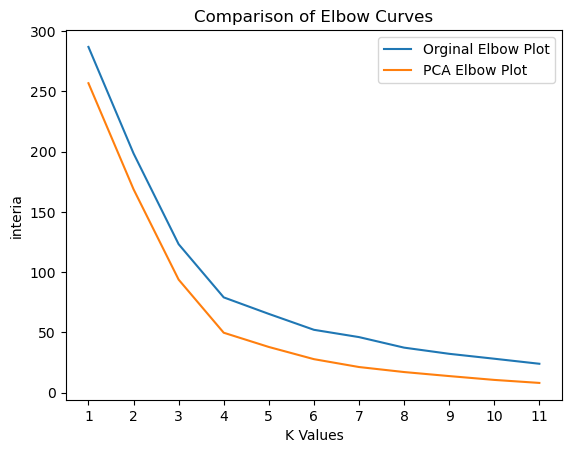

In [33]:
# Composite plot to contrast the Elbow curves
plt.plot(k_values,interia, label= 'Orginal Elbow Plot')
plt.plot(k, inertia2, label= 'PCA Elbow Plot')
plt.xlabel("K Values")
plt.ylabel("interia")
plt.xticks(k)
plt.title('Comparison of Elbow Curves')
plt.legend()

plt.show()

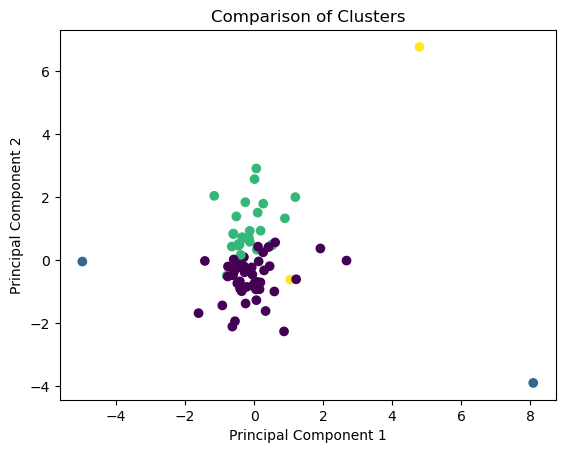

In [34]:
# Composite plot to contrast the clusters
# Colored by cluster
plt.scatter(df_clusters["price_change_percentage_24h"],df_clusters["price_change_percentage_7d"],c=df_clusters["predicted_clusters"], label='Original Cluster Data')
plt.scatter(crypto_pca_predict_df["PCA1"],crypto_pca_predict_df["PCA2"],c=crypto_pca_predict_df["predicted_clusters"], label="PCA Clusters")
plt.title("Comparison of Clusters")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


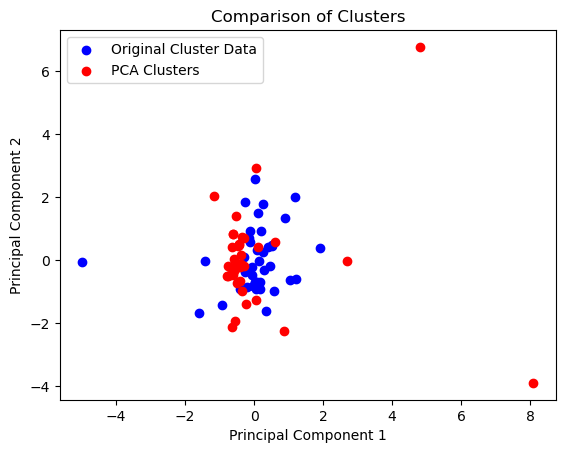

In [35]:
# Composite plot to contrast the clusters
# Colored by datasource
plt.scatter(df_clusters["price_change_percentage_24h"],df_clusters["price_change_percentage_7d"],c='b', label='Original Cluster Data')
plt.scatter(crypto_pca_predict_df["PCA1"],crypto_pca_predict_df["PCA2"],c='r', label="PCA Clusters")
plt.title("Comparison of Clusters")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The visual comparison of clustering results from both original and PCA-reduced datasets shows that using fewer features via PCA generally maintains similar clustering patterns and cluster numbers (k values). The Elbow plots are closely aligned, indicating that dimension reduction preserves essential clustering dynamics while slightly improving cluster compactness, as seen with slightly lower inertia values on the PCA plot. This suggests that PCA not only retains clustering inofrmation but also enhances computational efficiency and clarity in the results visualization and interpretation.